In [1]:
import pandas as pd
import pickle
pickle_path = ('../raw_data/viz.pickle')
with open(pickle_path, 'rb') as f:
    df = pickle.load(f)

In [2]:
import seaborn as sns
import pydeck as pdk
import matplotlib.pyplot as plt
import plotly.express as px
from ipywidgets import interact

In [3]:
df.head()

,precinct_number,offense_type,crime_completed,offense_level,premise_desc,premise,jurisdiction,park_name,suspect_age,suspect_race,...,victim_age,victim_race,victim_sex,period,borough,patrol_borough,year,month,day_of_week,hour
0,73,OFFENSES AGAINST PUBLIC ADMINI,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,NOT PARK,25-44,BLACK,...,<18,BLACK,M,2015-02-11 15:00:00,BROOKLYN,PATROL BORO BKLYN NORTH,2015,2,3,15
1,69,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,...,45-64,BLACK,F,2012-03-17 10:00:00,BROOKLYN,PATROL BORO BKLYN SOUTH,2012,3,6,10
2,71,HARRASSMENT 2,COMPLETED,VIOLATION,INSIDE,PUBLIC SCHOOL,N.Y. POLICE DEPT,NOT PARK,<18,BLACK,...,18-24,BLACK,M,2016-10-27 13:00:00,BROOKLYN,PATROL BORO BKLYN SOUTH,2016,10,4,13
3,112,RAPE,COMPLETED,FELONY,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,WHITE HISPANIC,...,25-44,WHITE,F,2014-11-27 19:00:00,QUEENS,PATROL BORO QUEENS NORTH,2014,11,4,19
4,24,GRAND LARCENY,COMPLETED,FELONY,INSIDE,DOCTOR/DENTIST OFFICE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,...,45-64,WHITE,F,2013-12-11 13:00:00,MANHATTAN,PATROL BORO MAN NORTH,2013,12,3,13


## Monthly evolution of criminality (11 years)

In [7]:
time_s = df.groupby(['year', 'month'], as_index=False).count()

time_series = time_s[['year', 'month', 'crime_completed']].rename(columns={'crime_completed':'nb_of_crimes'})

time_series.head()

,year,month,nb_of_crimes
0,2007,1,44572
1,2007,2,36420
2,2007,3,43192
3,2007,4,42097
4,2007,5,47129


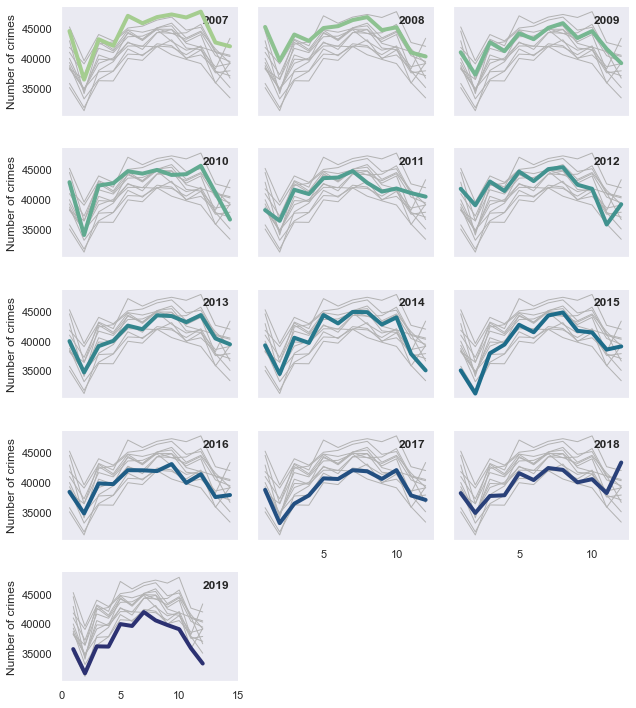

In [8]:
sns.set_theme(style="dark")
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=time_series,
    x="month", y="nb_of_crimes", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=time_series, x="month", y="nb_of_crimes", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Number of crimes")
g.tight_layout()

## Yearly evolution of criminality

In [53]:
time_series_y = df.groupby(['year'], as_index=False).count()

time_series_year = time_series_y[['year', 'crime_completed']].rename(columns={'crime_completed':'nb_of_crimes'})

time_series_year

,year,nb_of_crimes
0,2007,532894
1,2008,526741
2,2009,509253
3,2010,508252
4,2011,497136
5,2012,503234
6,2013,494495
7,2014,490827
8,2015,477833
9,2016,478716


/Users/GabrielHF/.pyenv/versions/3.8.5/envs/data_502/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


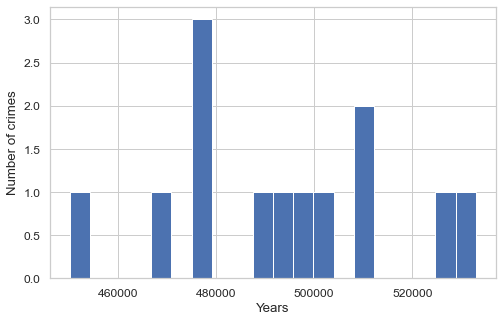

In [24]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    time_series_year['nb_of_crimes'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Years', ylabel='Number of crimes');

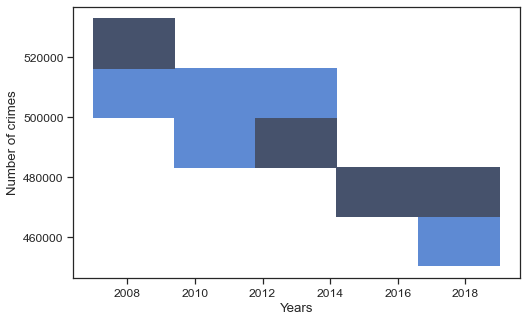

In [41]:
sns.set(style='ticks', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(time_series_year, x=time_series_year['year'], y=time_series_year['nb_of_crimes']).set(xlabel='Years', ylabel='Number of crimes');

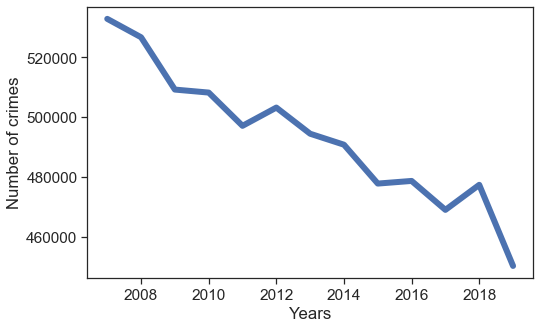

In [52]:
sns.set(style='ticks', palette="deep", font_scale=1.4, rc={"lines.linewidth": 6})
sns.lineplot(data=time_series_year, x=time_series_year['year'], y=time_series_year['nb_of_crimes']).set(xlabel='Years', ylabel='Number of crimes');

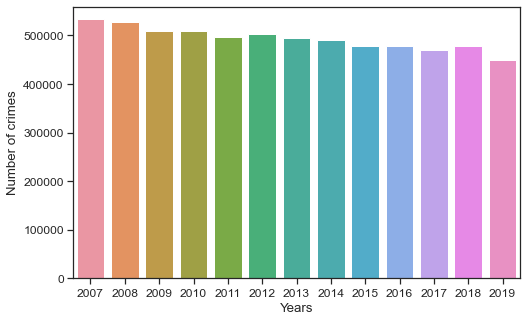

In [42]:
sns.set(style='ticks', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.barplot(data=time_series_year, x=time_series_year['year'], y=time_series_year['nb_of_crimes']).set(xlabel='Years', ylabel='Number of crimes');